<a href="https://colab.research.google.com/github/adisinha07/stock-price-/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Stock Price Tracker!

Choose an option:
1. Get current stock price
2. Get historical stock data
3. Visualize stock price trend
4. Exit
Enter your choice: 1
Enter stock symbol: AAPL
Current price of AAPL: $196.9800

Choose an option:
1. Get current stock price
2. Get historical stock data
3. Visualize stock price trend
4. Exit
Enter your choice: 2
Enter stock symbol: MSFT
Historical data for MSFT:
Date: 2025-04-17, Close: 367.7800
Date: 2025-04-16, Close: 371.6100
Date: 2025-04-15, Close: 385.7300
Date: 2025-04-14, Close: 387.8100
Date: 2025-04-11, Close: 388.4500
Date: 2025-04-10, Close: 381.3500
Date: 2025-04-09, Close: 390.4900

Choose an option:
1. Get current stock price
2. Get historical stock data
3. Visualize stock price trend
4. Exit
Enter your choice: GOOGL
Invalid choice. Please try again.

Choose an option:
1. Get current stock price
2. Get historical stock data
3. Visualize stock price trend
4. Exit
Enter your choice: 3
Enter stock symbol: INFY


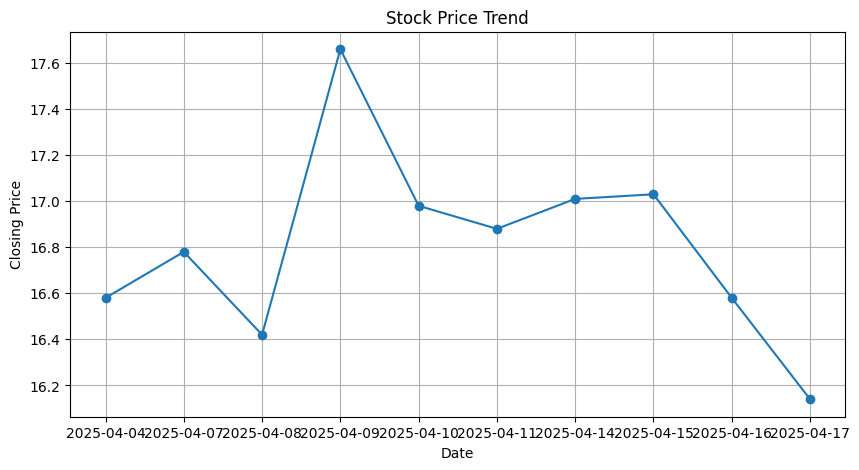


Choose an option:
1. Get current stock price
2. Get historical stock data
3. Visualize stock price trend
4. Exit
Enter your choice: 4
Thank you for using the Stock Price Tracker. Goodbye!


In [ ]:
import requests
import matplotlib.pyplot as plt

API_KEY = "your_api_key_here"  # Replace with your actual API key
BASE_URL = "https://www.alphavantage.co/query"

def get_stock_price(symbol):
    params = {
        "function": "GLOBAL_QUOTE",
        "symbol": symbol,
        "apikey": API_KEY
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if "Global Quote" in data and "05. price" in data["Global Quote"]:
        return data["Global Quote"]["05. price"]
    else:
        print("API Response:", data)
        return "Invalid Symbol, API Limit Reached, or API Response Format Changed"

def get_historical_data(symbol, output_size="compact"):
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": output_size,
        "apikey": API_KEY
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    if "Time Series (Daily)" in data:
        return data["Time Series (Daily)"]
    else:
        print("API Response:", data)
        return None

def plot_stock_trend(historical_data):
    if historical_data:
        dates = list(historical_data.keys())[:10]
        prices = [float(historical_data[date]["4. close"]) for date in dates]
        dates.reverse()
        prices.reverse()

        plt.figure(figsize=(10, 5))
        plt.plot(dates, prices, marker='o')
        plt.title("Stock Price Trend")
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.grid()
        plt.show()
    else:
        print("No historical data available to plot.")

if __name__ == "__main__":
    print("Welcome to the Stock Price Tracker!")
    while True:
        print("\nChoose an option:")
        print("1. Get current stock price")
        print("2. Get historical stock data")
        print("3. Visualize stock price trend")
        print("4. Exit")

        choice = input("Enter your choice: ")
        if choice == "1":
            stock_symbol = input("Enter stock symbol: ").upper()
            price = get_stock_price(stock_symbol)
            print(f"Current price of {stock_symbol}: ${price}")

        elif choice == "2":
            stock_symbol = input("Enter stock symbol: ").upper()
            data = get_historical_data(stock_symbol)
            if data:
                print(f"Historical data for {stock_symbol}:")
                for date, values in list(data.items())[:7]:
                    print(f"Date: {date}, Close: {values['4. close']}")
            else:
                print("Failed to fetch historical data.")

        elif choice == "3":
            stock_symbol = input("Enter stock symbol: ").upper()
            historical_data = get_historical_data(stock_symbol)
            plot_stock_trend(historical_data)

        elif choice == "4":
            print("Thank you for using the Stock Price Tracker. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")